In [1]:
from mplsoccer.pitch import Pitch
import os
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'//Users/rao/Desktop/Football_Data/match_data/2021_data/LaLiga/Barca_Elche.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = df[['teamId', 'playerId', 'minute', 'second', 'x', 'y','endX', 'endY', 'type/displayName','outcomeType/displayName']]
df = df[df['teamId'] == 65]
df = df[df['type/displayName'] == 'Pass']

## Starting pass location heatmap
#### Darker bin = high frequency of passes 
#### Lighter bin = low frequency of passes

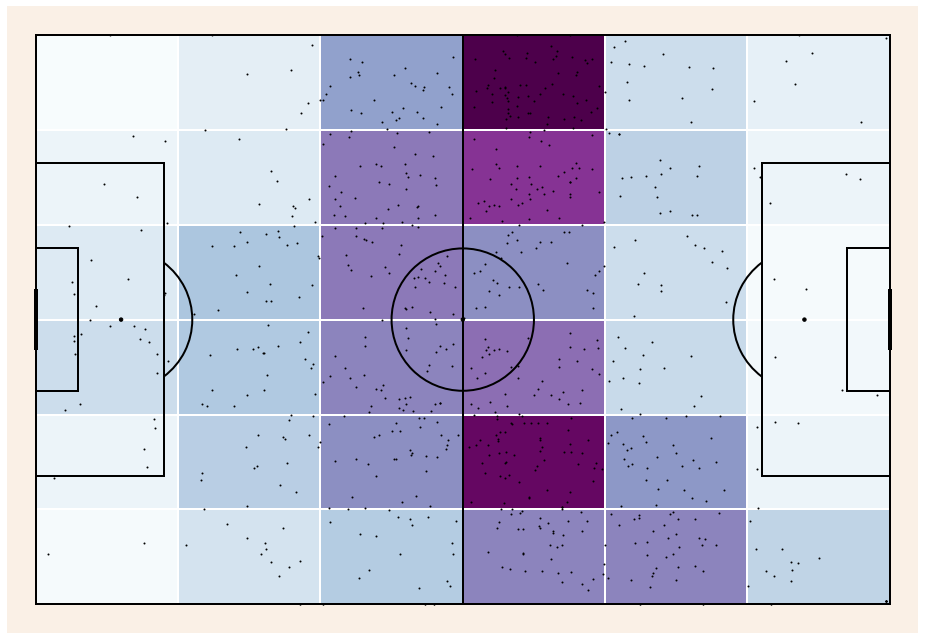

In [5]:
pitch = Pitch(pitch_type='statsbomb', figsize=(16, 9), line_zorder=2,
              pitch_color='linen', line_color='black', orientation='horizontal')

fig, ax = pitch.draw()

bins = (6,6)

for i, bin in enumerate(bins):
    bin_passes = pitch.bin_statistic(1.2*df.x, 0.8*df.y, statistic='count', bins=bin) 
    pitch.heatmap(bin_passes, ax=ax, cmap='BuPu', edgecolors='white')
    pitch.scatter(1.2*df.x, 0.8*df.y, c= 'black' , s=1, ax=ax)

### Heatmap can also be made for other factors like - Ball Touch, Recoveries, Tackles, Defensive Actions, etc